# Imports

In [1]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import euclidean, cdist

from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

C:\Users\Kaushik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load the data

In [2]:
india = pd.read_csv("../Data/India.csv", skiprows=2)
india['Month'] = pd.to_datetime(india['Month'], infer_datetime_format=True)
india = india.set_index(['Month'])
india.sort_index(inplace=True)
print(india.dtypes)
india.head()

what is vaping: (India)    int64
is vaping safe: (India)    int64
vaping shop: (India)       int64
vaping device: (India)     int64
dtype: object


,what is vaping: (India),is vaping safe: (India),vaping shop: (India),vaping device: (India)
Month,,,,
2004-01-01,0,0,0,0
2004-02-01,0,0,0,0
2004-03-01,0,0,0,0
2004-04-01,0,0,0,0
2004-05-01,0,0,0,0


In [3]:
uk = pd.read_csv("../Data/UK.csv", skiprows=2)
uk['Month'] = pd.to_datetime(uk['Month'], infer_datetime_format=True)
uk = uk.set_index(['Month'])
uk.sort_index(inplace=True)
print(uk.dtypes)
uk.head()

what is vaping: (United Kingdom)    int64
is vaping safe: (United Kingdom)    int64
vaping shop: (United Kingdom)       int64
vaping device: (United Kingdom)     int64
dtype: object


,what is vaping: (United Kingdom),is vaping safe: (United Kingdom),vaping shop: (United Kingdom),vaping device: (United Kingdom)
Month,,,,
2004-01-01,0,0,0,0
2004-02-01,0,0,0,0
2004-03-01,0,0,0,0
2004-04-01,0,0,0,0
2004-05-01,0,0,0,0


In [4]:
usa = pd.read_csv("../Data/USA.csv", skiprows=2)
usa['Month'] = pd.to_datetime(usa['Month'], infer_datetime_format=True)
usa = usa.set_index(['Month'])
usa.sort_index(inplace=True)
print(usa.dtypes)
usa.head()

what is vaping: (United States)     int64
is vaping safe: (United States)     int64
vaping shop: (United States)        int64
vaping device: (United States)     object
dtype: object


,what is vaping: (United States),is vaping safe: (United States),vaping shop: (United States),vaping device: (United States)
Month,,,,
2004-01-01,0,0,0,0
2004-02-01,0,0,0,0
2004-03-01,0,0,0,0
2004-04-01,0,0,0,0
2004-05-01,0,0,0,0


In [41]:
canada = pd.read_csv("../Data/Canada.csv", skiprows=2)
canada['Month'] = pd.to_datetime(canada['Month'], infer_datetime_format=True)
canada = canada.set_index(['Month'])
canada.sort_index(inplace=True)
print(canada.dtypes)
canada.head()

what is vaping: (Canada)    int64
is vaping safe: (Canada)    int64
vaping shop: (Canada)       int64
vaping device: (Canada)     int64
dtype: object


,what is vaping: (Canada),is vaping safe: (Canada),vaping shop: (Canada),vaping device: (Canada)
Month,,,,
2004-01-01,0,0,0,0
2004-02-01,0,0,0,0
2004-03-01,0,0,0,0
2004-04-01,0,0,0,0
2004-05-01,0,0,0,0


# Preprocess

In [5]:
usa.replace({'<1': 0}, inplace=True)
usa['vaping device: (United States)'] = usa['vaping device: (United States)'].astype('int64')

# Visualize

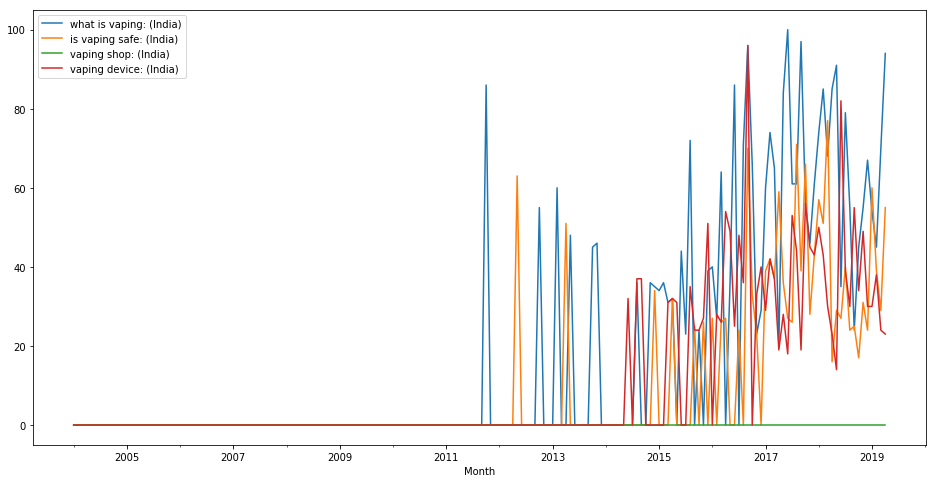

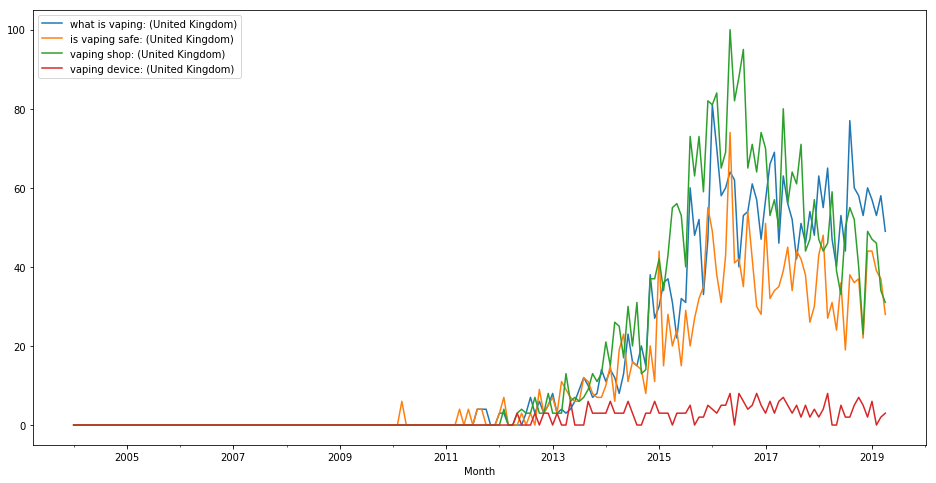

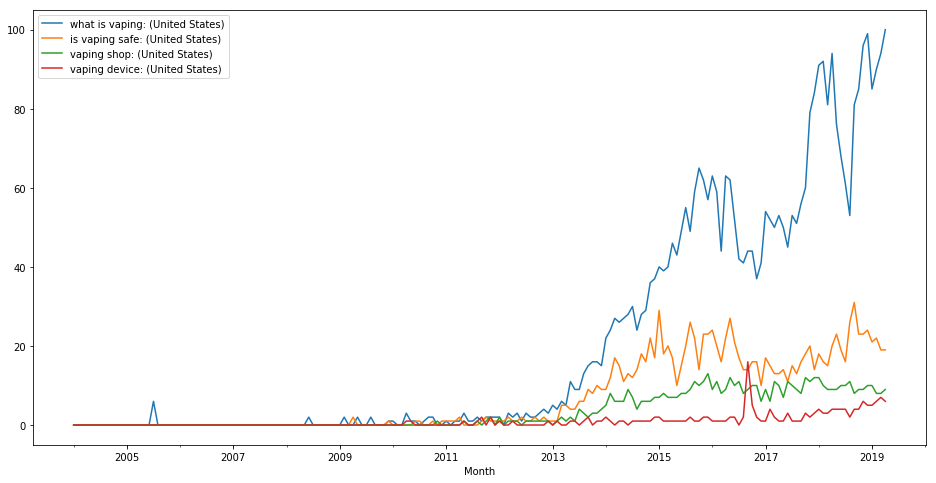

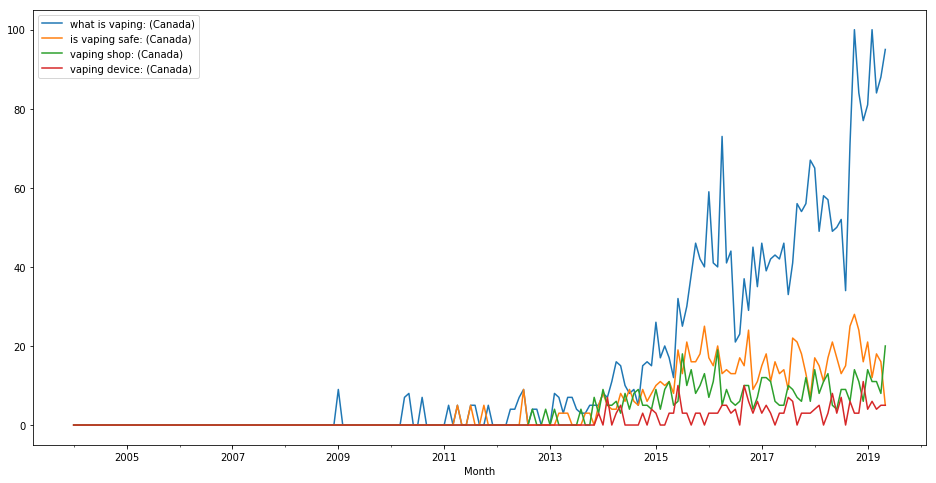

In [42]:
plt.rcParams['figure.figsize'] = (16,8)
india.plot()
uk.plot()
usa.plot()
canada.plot()
plt.legend()
plt.rcParams['figure.figsize'] = (6,4)

# Similarity models

## DTW

In [7]:
# https://nipunbatra.github.io/blog/2014/dtw.html

## GAK

In [8]:
# https://web.sfc.wide.ad.jp/~kurosagi/public-posts/2017-04-11-global-alignment-kernels.html

## FastDTW

In [9]:
# https://pypi.org/project/fastdtw/

In [10]:
from fastdtw import fastdtw

### Full Data

In [44]:
india_mat = india.values
uk_mat = uk.values
usa_mat = usa.values
canada_mat = canada.values

In [45]:
distance, path = fastdtw(india_mat, uk_mat, dist=euclidean)
print("Distance between India and UK:", distance)

distance, path = fastdtw(india_mat, usa_mat, dist=euclidean)
print("Distance between India and USA:", distance)

distance, path = fastdtw(uk_mat, usa_mat, dist=euclidean)
print("Distance between UK and USA:", distance)

distance, path = fastdtw(canada_mat, uk_mat, dist=euclidean)
print("Distance between Canada and UK:", distance)

distance, path = fastdtw(canada_mat, usa_mat, dist=euclidean)
print("Distance between Canada and USA:", distance)

distance, path = fastdtw(canada_mat, india_mat, dist=euclidean)
print("Distance between Canada and India:", distance)

Distance between India and UK: 4917.9762267450105
Distance between India and USA: 3478.9266464043635
Distance between UK and USA: 3498.851288948
Distance between Canada and UK: 3395.034811078549
Distance between Canada and USA: 996.573366401653
Distance between Canada and India: 3319.8685350109586


### Last 1 year

In [46]:
india_mat = india[india.index.year==2018].values
uk_mat = uk[uk.index.year==2018].values
usa_mat = usa[usa.index.year==2018].values
canada_mat = canada[canada.index.year==2018].values

In [47]:
distance, path = fastdtw(india_mat, uk_mat, dist=euclidean)
print("Distance between India and UK:", distance)

distance, path = fastdtw(india_mat, usa_mat, dist=euclidean)
print("Distance between India and USA:", distance)

distance, path = fastdtw(uk_mat, usa_mat, dist=euclidean)
print("Distance between UK and USA:", distance)

distance, path = fastdtw(canada_mat, uk_mat, dist=euclidean)
print("Distance between Canada and UK:", distance)

distance, path = fastdtw(canada_mat, usa_mat, dist=euclidean)
print("Distance between Canada and USA:", distance)

distance, path = fastdtw(canada_mat, india_mat, dist=euclidean)
print("Distance between Canada and India:", distance)

Distance between India and UK: 821.8489756911822
Distance between India and USA: 625.7967125359412
Distance between UK and USA: 593.955035876165
Distance between Canada and UK: 548.1638437106723
Distance between Canada and USA: 271.1476669325651
Distance between Canada and India: 642.7631700588431


## TSLearn

In [15]:
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.metrics.html

In [16]:
from tslearn.metrics import dtw_path

### Full Data

In [48]:
india_mat = india.values
uk_mat = uk.values
usa_mat = usa.values
canada_mat = canada.values

In [49]:
path, distance = dtw_path(india_mat, uk_mat)
print("Distance between India and UK:", distance)

path, distance = dtw_path(india_mat, usa_mat)
print("Distance between India and USA:", distance)

path, distance = dtw_path(uk_mat, usa_mat)
print("Distance between UK and USA:", distance)

path, distance = dtw_path(canada_mat, uk_mat)
print("Distance between Canada and UK:", distance)

path, distance = dtw_path(canada_mat, usa_mat)
print("Distance between Canada and USA:", distance)

path, distance = dtw_path(canada_mat, india_mat)
print("Distance between Canada and India:", distance)

Distance between India and UK: 586.6208315428289
Distance between India and USA: 399.17038968340324
Distance between UK and USA: 427.67627944509616
Distance between Canada and UK: 404.84935469875705
Distance between Canada and USA: 101.90682018393078
Distance between Canada and India: 387.2492737243028


### Last 1 year

In [50]:
india_mat = india[india.index.year==2018].values
uk_mat = uk[uk.index.year==2018].values
usa_mat = usa[usa.index.year==2018].values
canada_mat = canada[canada.index.year==2018].values

In [51]:
path, distance = dtw_path(india_mat, uk_mat)
print("Distance between India and UK:", distance)

path, distance = dtw_path(india_mat, usa_mat)
print("Distance between India and USA:", distance)

path, distance = dtw_path(uk_mat, usa_mat)
print("Distance between UK and USA:", distance)

path, distance = dtw_path(canada_mat, uk_mat)
print("Distance between Canada and UK:", distance)

path, distance = dtw_path(canada_mat, usa_mat)
print("Distance between Canada and USA:", distance)

path, distance = dtw_path(canada_mat, india_mat)
print("Distance between Canada and India:", distance)

Distance between India and UK: 236.92825918408298
Distance between India and USA: 187.36328348958875
Distance between UK and USA: 173.38685071250356
Distance between Canada and UK: 158.18343781824947
Distance between Canada and USA: 71.74956445860839
Distance between Canada and India: 185.835949159467


# Averaging models

In [21]:
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.barycenters.html
# https://blog.acolyer.org/2016/05/13/dynamic-time-warping-averaging-of-time-series-allows-faster-and-more-accurate-classification/

# Clustering models

## TimeSeriesKMeans

In [22]:
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.clustering.html

In [23]:
from tslearn.clustering import TimeSeriesKMeans

### Full Data

In [60]:
india_mat = india.values
uk_mat = uk.values
usa_mat = usa.values

all_mat = np.array([india_mat, uk_mat, usa_mat])
all_mat

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [ 45,  39,   0,  38],
        [ 70,  29,   0,  24],
        [ 94,  55,   0,  23]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [ 53,  39,  46,   0],
        [ 58,  37,  34,   2],
        [ 49,  28,  31,   3]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [ 90,  22,   8,   6],
        [ 94,  19,   8,   7],
        [100,  19,   9,   6]]], dtype=int64)

In [58]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 184, 4)
[0 1 0]


In [26]:
km = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 184, 4)
[0 1 0]


In [27]:
km = TimeSeriesKMeans(n_clusters=2, metric="softdtw", max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 184, 4)
[0 1 0]


### Last 1 year

In [28]:
india_mat = india[india.index.year==2018].values
uk_mat = uk[uk.index.year==2018].values
usa_mat = usa[usa.index.year==2018].values

all_mat = np.array([india_mat, uk_mat, usa_mat])
all_mat

array([[[74, 57,  0, 50],
        [85, 51,  0, 43],
        [68, 77,  0, 30],
        [85, 16,  0, 23],
        [91, 29,  0, 14],
        [35, 27,  0, 82],
        [79, 40,  0, 39],
        [55, 24,  0, 30],
        [24, 25,  0, 55],
        [45, 17,  0, 34],
        [55, 31,  0, 49],
        [67, 24,  0, 30]],

       [[63, 43, 47,  2],
        [55, 48, 44,  4],
        [65, 27, 46,  8],
        [47, 31, 59,  0],
        [40, 24, 39,  0],
        [53, 36, 33,  5],
        [44, 19, 50,  2],
        [77, 38, 55,  2],
        [60, 36, 52,  5],
        [58, 37, 40,  7],
        [53, 22, 23,  5],
        [60, 44, 49,  2]],

       [[91, 18, 12,  4],
        [92, 16, 10,  3],
        [81, 15,  9,  3],
        [94, 20,  9,  4],
        [76, 23,  9,  4],
        [68, 19, 10,  4],
        [61, 16, 10,  4],
        [53, 26, 11,  2],
        [81, 31,  8,  4],
        [85, 23,  9,  4],
        [96, 23,  9,  6],
        [99, 24, 10,  5]]], dtype=int64)

In [29]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 12, 4)
[0 1 1]


In [30]:
km = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 12, 4)
[0 1 1]


In [31]:
km = TimeSeriesKMeans(n_clusters=2, metric="softdtw", max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 12, 4)
[0 1 1]


# Classification models

## DTW + 1-NN

In [32]:
# https://stats.stackexchange.com/questions/323571/how-to-classify-m-multivariate-time-series-into-k-known-categories
# https://github.com/alexminnaar/time-series-classification-and-clustering

## KNeighborsTimeSeriesClassifier

In [33]:
# https://tslearn.readthedocs.io/en/latest/auto_examples/plot_neighbors.html
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.neighbors.html
# https://github.com/markdregan/K-Nearest-Neighbors-with-Dynamic-Time-Warping

In [34]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier

### Full Data

In [61]:
india_mat = india.values
uk_mat = uk.values
usa_mat = usa.values

In [64]:
clf = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw")
clf.fit([india_mat, uk_mat], y=[0, 1])
clf.predict(usa_mat)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

### Last 1 year

In [37]:
india_mat = india[india.index.year==2018].values
uk_mat = uk[uk.index.year==2018].values
usa_mat = usa[usa.index.year==2018].values

In [38]:
clf = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw")
clf.fit([india_mat, uk_mat], y=[0, 1])
clf.predict(usa_mat)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## LSTM

In [39]:
# https://www.analyticsvidhya.com/blog/2019/01/introduction-time-series-classification/

## SFA

In [40]:
# https://github.com/patrickzib/SFA